## Sentiment Analysis

**Project By:** Courtney Owusu-Bour <br>
**Course:** CISD 43 – BIG DATA (Spring 2024)

### Problem Statement
* This project  is about Sentiment Analysis on IMDB Reviews.
    
* **Keywords:** Sentiment Analysis, Linear Regression, Polarity, Subjectivity

### Methodology

In this project, I used an IMDB data set provided by my professor. Pandas library was used to import the data and create a data frame. Text blob library was used to create a function and return sentiment polarity and sentiment subjectivity scores. I also classified the sentiment using a function, then calculated length of reviews using `.apply(len)`  and added both to the data frame. A series of exploratory data analyses were performed. Linear regression module was imported to compute the linear relationship between polarity, subjectivity and the target variable, review length. The model was trained, predictions were made, and the model was evaluated using mean squared error and r2 score. 

### Required Packages

In [1]:
#import libraries for analysis
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from wordcloud import WordCloud

#import for sentiment analysis
from textblob import TextBlob

#import required libraries for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#diasable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data into a datafrrame
file_path = 'imdb_labelled.txt'
df = pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'label'])

In [3]:
# Function to calculate polarity and subjectivity
def get_sentiment(imdb):
    blob = TextBlob(imdb)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Use code to apply the function to each sentence and create new columns for polarity and subjectivity
df['polarity'], df['subjectivity'] = zip(*df['review'].apply(get_sentiment))

# Function to classify review as positive, negative, or neutral. 
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply the classification function to the polarity column
df['sentiment'] = df['polarity'].apply(classify_sentiment)

#get length of reviews
df['review_length'] = df['review'].apply(len)

#Show the updated DataFrame
print(df.head())

                                              review  label  polarity  \
0  A very, very, very slow-moving, aimless movie ...      0  0.180000   
1  Not sure who was more lost - the flat characte...      0  0.014583   
2  Attempting artiness with black & white and cle...      0 -0.122917   
3       Very little music or anything to speak of.        0 -0.243750   
4  The best scene in the movie was when Gerardo i...      1  1.000000   

   subjectivity sentiment  review_length  
0      0.395000  positive             87  
1      0.420139   neutral             99  
2      0.514583  negative            188  
3      0.650000  negative             44  
4      0.300000  positive            108  


In [4]:
#save dataframe to csv file (not required)
df.to_csv('imdb_reviews_with_sentiment.csv', index=False)

### Exploratory Data Analysis (EDA)

In [5]:
#Review the dataset and observe any abnormalities
df.head()

,review,label,polarity,subjectivity,sentiment,review_length
0,"A very, very, very slow-moving, aimless movie ...",0,0.180000,0.395000,positive,87
1,Not sure who was more lost - the flat characte...,0,0.014583,0.420139,neutral,99
2,Attempting artiness with black & white and cle...,0,-0.122917,0.514583,negative,188
3,Very little music or anything to speak of.,0,-0.243750,0.650000,negative,44
4,The best scene in the movie was when Gerardo i...,1,1.000000,0.300000,positive,108


In [6]:
#gives us descriptive stats
df.describe()

,label,polarity,subjectivity,review_length
count,748.000000,748.000000,748.000000,748.000000
mean,0.516043,0.079962,0.518182,110.986631
std,0.500077,0.420635,0.307989,380.627728
min,0.000000,-1.000000,0.000000,7.000000
25%,0.000000,-0.117188,0.306250,42.750000
50%,1.000000,0.023500,0.540000,72.000000
75%,1.000000,0.350000,0.750000,112.250000
max,1.000000,1.000000,1.000000,7944.000000


In [7]:
#gives us info on each column and rows, there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review         748 non-null    object 
 1   label          748 non-null    int64  
 2   polarity       748 non-null    float64
 3   subjectivity   748 non-null    float64
 4   sentiment      748 non-null    object 
 5   review_length  748 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 35.2+ KB


**Visualizations to further observe**

<Axes: xlabel='sentiment', ylabel='count'>

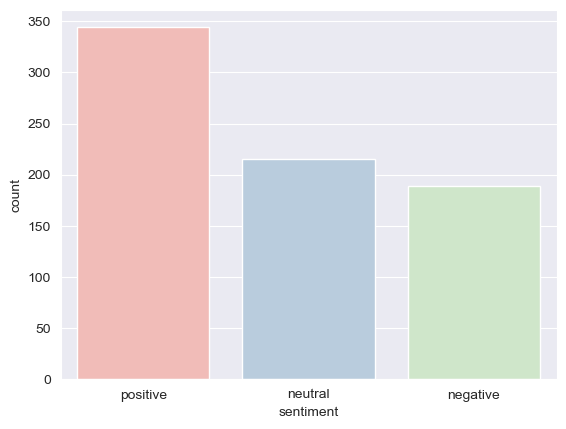

In [8]:
#Visualization quantity of each sentiment value
sns.countplot(df, x='sentiment', palette='Pastel1')

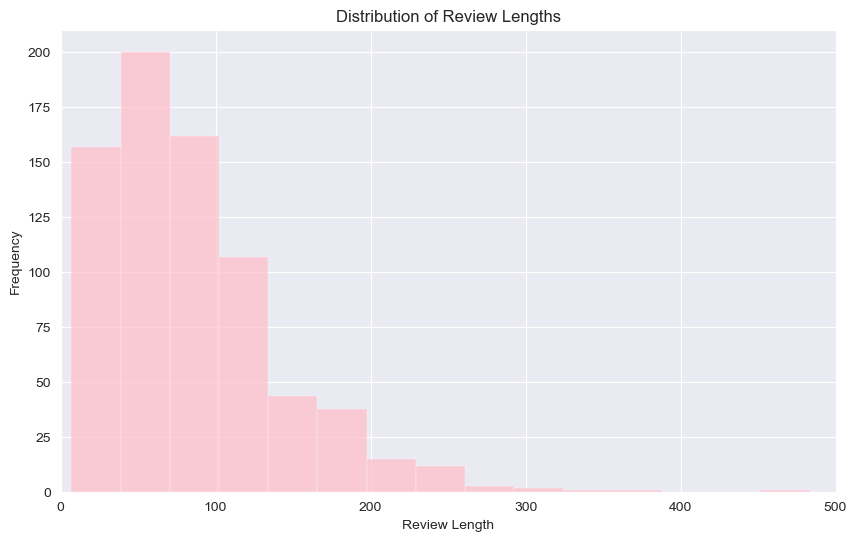

In [9]:
#Review and analyze length of reviews. We can see most reviews were pretty short
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', bins=250, color='pink')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

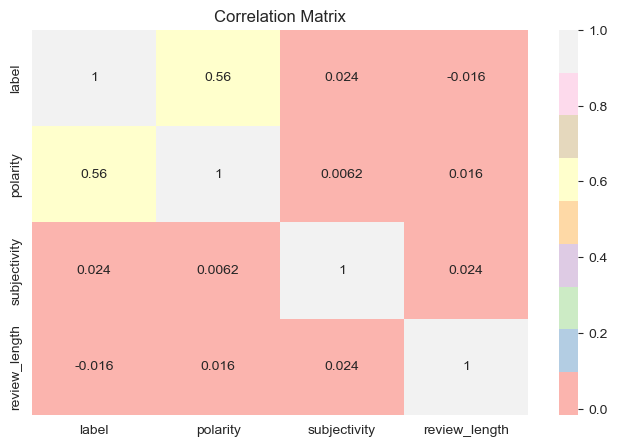

In [10]:
#Correlation Analysis 
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')
plt.title('Correlation Matrix')
plt.show()

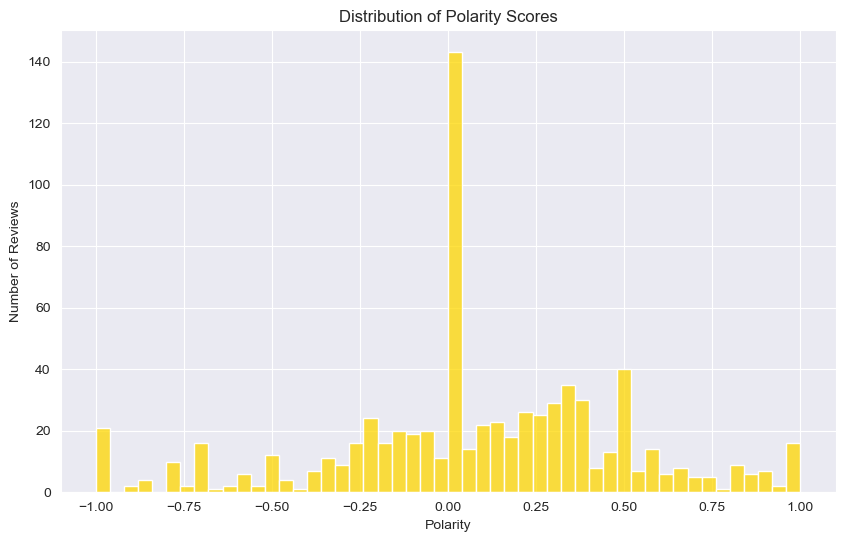

In [11]:
#Plot the distribution of polarity scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='polarity', bins=50, color='gold')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.show()

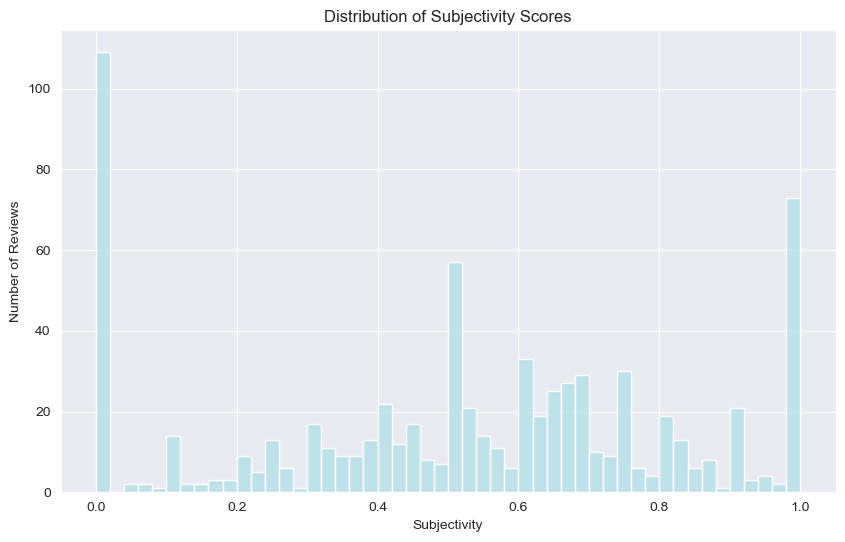

In [12]:
#Plot the distribution of subjectivity scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='subjectivity', bins=50, color='powderblue')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Number of Reviews')
plt.show()

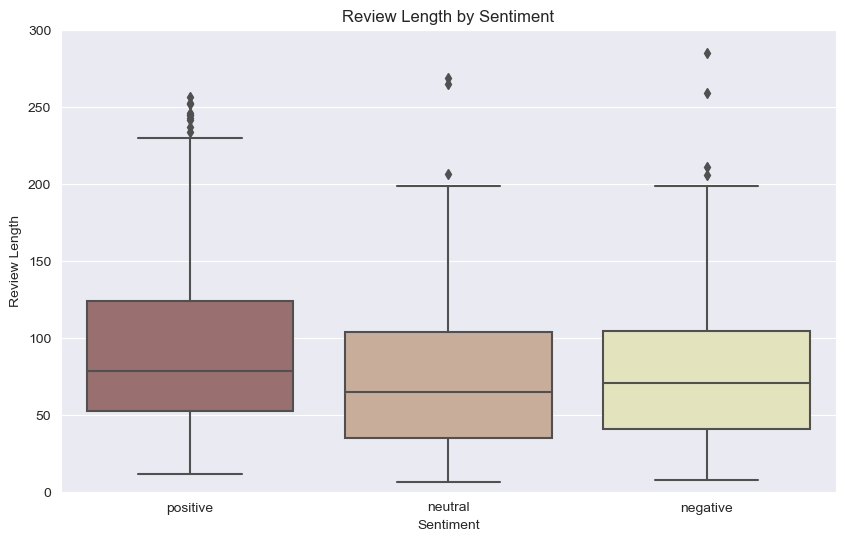

In [13]:
# Boxplot of review length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='review_length', palette='pink')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.ylim(0, 300)
plt.show()

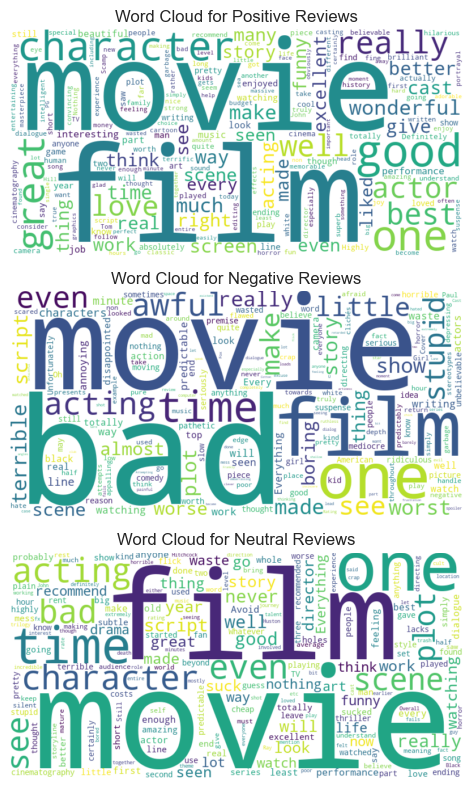

In [14]:
#Word cloud to see what kind of words each sentiment holds
#Interesting to see how obvious it is
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])
neutral_reviews = ' '.join(df[df['sentiment'] == 'neutral']['review'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()

### Machine Learning

In [15]:
#Prepare features. Y is the target variable, what we are trying to predict
X = df[['polarity', 'subjectivity']]
y = df['review_length']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#Calculate predictions on the test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 92833.08458067368
R² Score: -0.0023211766065198702


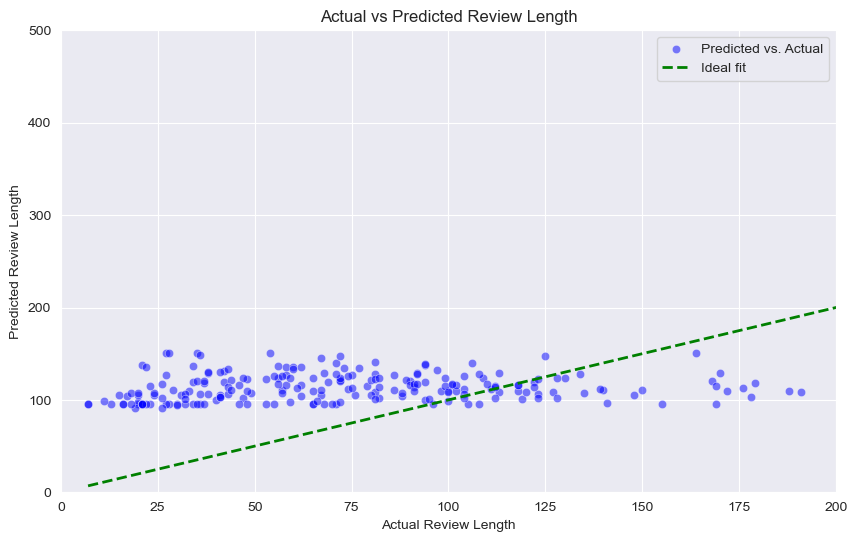

In [19]:
#Plot the result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label='Predicted vs. Actual', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal fit', color='green')
plt.xlabel('Actual Review Length')
plt.ylabel('Predicted Review Length')
plt.title('Actual vs Predicted Review Length')
plt.xlim(0, 200)
plt.ylim(0, 500)
plt.legend()
plt.show()

### Conclusions


I tried to perform a linear regression to gain insight on how well polarity and subjectivity can predict the length of reviews. Given the extremely weak correlation, I calculated earlier, it would seem to be difficult to draw meaningful conclusions or make predictions based on the relationship. All variables of interest had extremely weak linear relationships. Later I used `r2_score` and `mean_squared_error` to calculate the performance of the regression model. <br>

The MSE was 1057.8908 meaning the squared difference between the actual and predicted valued is around 1057.8908. The R-squared score was -0.0187. A negative score indicates that the model performed poorly and does not explain very well the variability in the target variable. <br>

The regression model may not have been the best fit for this data.

###  References
   - https://www.geeksforgeeks.org/
   - Linear_Regression_with_Python_Example_1
   - Tutorial Sentiment Analysis with TextBlob

### Credits

- Example 1 Sentiment Analysis
> *This code is adapted from an example provided in class that used yelp review data *